In [1]:
# Import pertinent packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import os
from sklearn.metrics import RocCurveDisplay

In [2]:
# Read in .csv and print summary
data = pd.read_csv("breast_tumor_classification.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Change "M" (malignant) and "B" (benign) markers to 1 and 0, respectively
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

# Print number of each class (M vs B) to check for even-ness
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [4]:
# Check for missing (NaN) values
if any(data.isnull().sum()):
    raise ValueError("Data has missing values!")

# Drop ID column - not a predictor    
data.drop('id', axis=1, inplace = True)

# Check columns visually
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Select Features
feature = data.drop('diagnosis', axis=1)

# Select Target
target = data['diagnosis']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, shuffle = True, test_size=0.3, random_state=42)

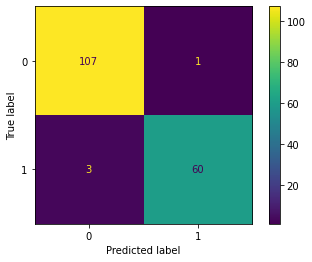

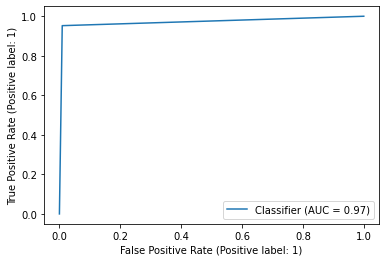

(0.9766081871345029,
 array([[107,   1],
        [  3,  60]]))

In [70]:
# k Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

def kNN(plot=True, **kwargs):
    # Train
    model = KNeighborsClassifier(**kwargs)
    model = model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    
    # Test
    acc = model.score(x_test, y_test)
    confusion = sk.metrics.confusion_matrix(y_test, y_predict)
    
    # Plotting
    if plot: # option to disable plotting (for looping)
        
        # Confusion Matrix
        disp = sk.metrics.ConfusionMatrixDisplay(confusion)
        disp.plot()
        plt.show()
        
        # ROC curve
        RocCurveDisplay.from_predictions(y_test, y_predict)
        plt.show()

    return (acc, confusion)
    
    
kNN(n_neighbors=11)

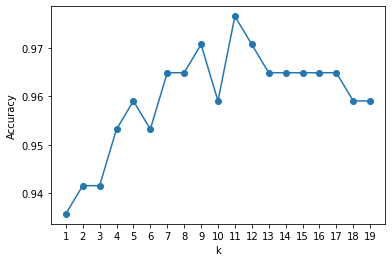

In [77]:
# Loop for optimizing kNN neighbors

# initialize arrays
k = []
accs = []

# Loop over range of reasonable values, calculate, and append
for i in np.arange(1, 20):
    k.append(i)
    (acc, confusion) = kNN(n_neighbors=i, plot=False)
    accs.append(acc)

# Plot k vs accuracy
plt.plot(k, accs, '-o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.show()

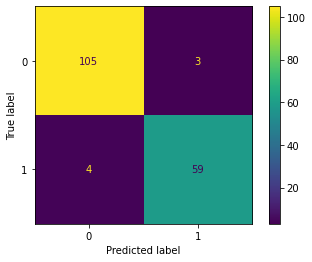

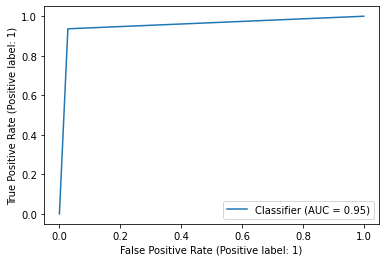

(0.9590643274853801,
 array([[105,   3],
        [  4,  59]]))

In [72]:
from sklearn.ensemble import BaggingClassifier

def Bagged(**kwargs):
    # Train
    model = BaggingClassifier(**kwargs)
    model = model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    
    # Test
    acc = model.score(x_test, y_test)
    confusion = sk.metrics.confusion_matrix(y_test, y_predict)
    
    # Plotting
    if plot: # option to disable plotting (for looping)
        
        # Confusion Matrix
        disp = sk.metrics.ConfusionMatrixDisplay(confusion)
        disp.plot()
        plt.show()
        
        # ROC curve
        RocCurveDisplay.from_predictions(y_test, y_predict)
        plt.show()

    return (acc, confusion)


Bagged(n_estimators=100)

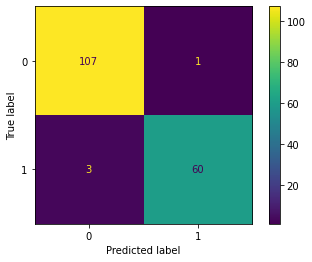

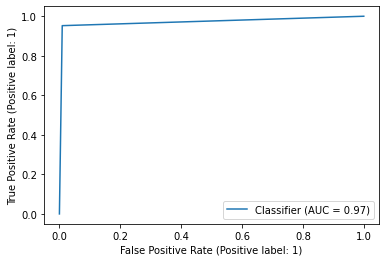

(0.9766081871345029,
 array([[107,   1],
        [  3,  60]]))

In [75]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

def random_forest(**kwargs):
    # Train
    model = RandomForestClassifier(**kwargs)
    model = model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    
    # Test
    acc = model.score(x_test, y_test)
    confusion = sk.metrics.confusion_matrix(y_test, y_predict)
    
    # Plotting
    if plot: # option to disable plotting (for looping)
        
        # Confusion Matrix
        disp = sk.metrics.ConfusionMatrixDisplay(confusion)
        disp.plot()
        plt.show()
        
        # ROC curve
        RocCurveDisplay.from_predictions(y_test, y_predict)
        plt.show()

    return (acc, confusion)
    
    
random_forest()